In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans


Importing the dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
df = pd.DataFrame(dataset)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Checking for Null Values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.rename({'Spending Score (1-100)':'Spending Score','Annual Income (k$)':'Annual Income'},inplace=True,axis=1)

In [7]:
# DataFrame Columns
df.columns
columns= ['CustomerID', 'Age', 'Annual Income','Spending Score']

In [8]:
# checking for Infinity values

for i in columns:
    print(f"{i}: ",np.isinf(df[i]).sum())


CustomerID:  0
Age:  0
Annual Income:  0
Spending Score:  0


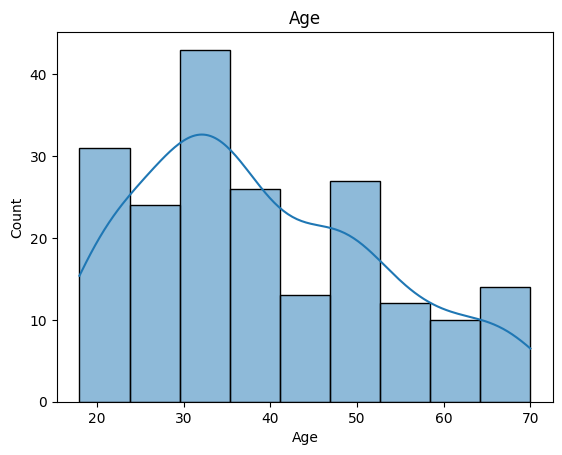

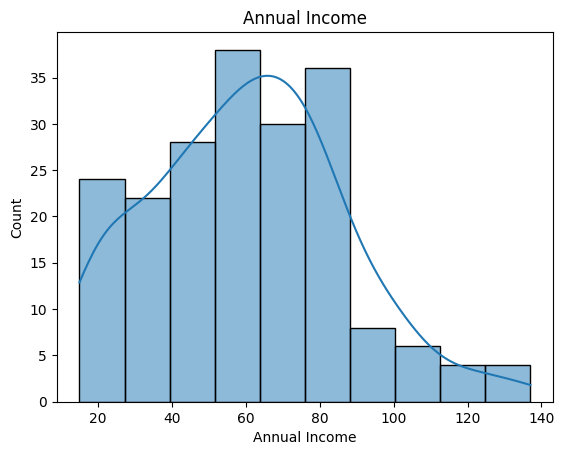

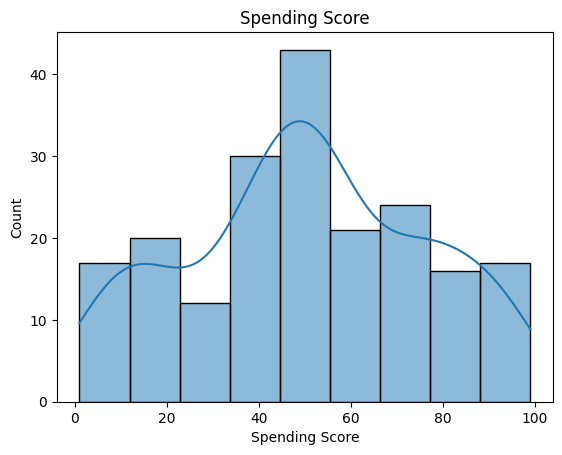

In [9]:
sns.histplot(data=df,x = 'Age',kde=True)
plt.title('Age')
plt.show() 

sns.histplot(df['Annual Income'],kde=True)
plt.title('Annual Income')
plt.show()

sns.histplot(df['Spending Score'],kde=True)
plt.title('Spending Score')
plt.show()


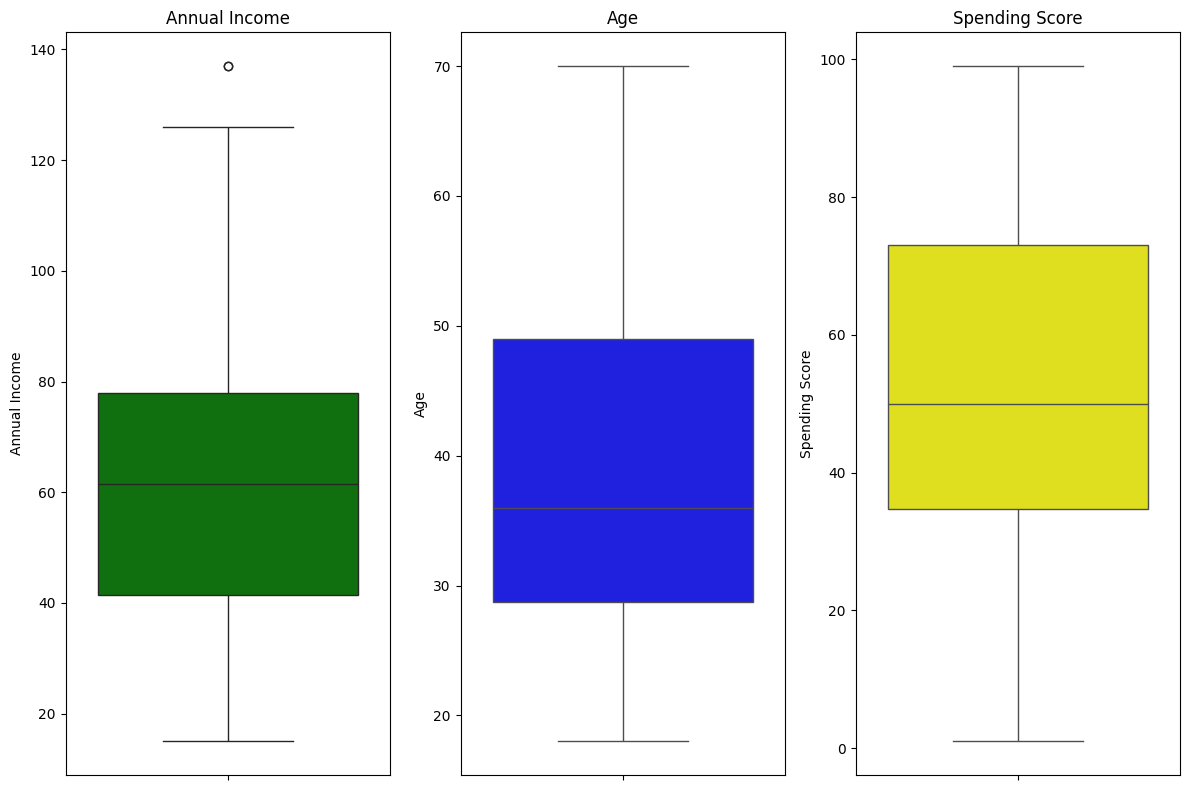

In [10]:
#Checking for any outliers.

plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
sns.boxplot(df['Annual Income'],color='green')
plt.title('Annual Income')

plt.subplot(1,3,2)
sns.boxplot(df['Age'],color='blue')
plt.title('Age')

plt.subplot(1,3,3)
sns.boxplot(df['Spending Score'],color='yellow')
plt.title('Spending Score')

plt.tight_layout()



we can see that there is an outlier in the Annual income , let's check that and remove from the dataframe.

In [11]:
Q1 = df['Annual Income'].quantile(0.25)
Q3 = df['Annual Income'].quantile(0.75)

IQR = Q3-Q1

lower_bond = Q1 - 1.5 * IQR
upper_bond = Q1 + 1.5 * IQR

In [12]:
# Outliers

df[(df['Annual Income'] < lower_bond ) | (df['Annual Income'] > upper_bond)]

,CustomerID,Gender,Age,Annual Income,Spending Score
180,181,Female,37,97,32
181,182,Female,32,97,86
182,183,Male,46,98,15
183,184,Female,29,98,88
184,185,Female,41,99,39
185,186,Male,30,99,97
186,187,Female,54,101,24
187,188,Male,28,101,68
188,189,Female,41,103,17
189,190,Female,36,103,85


Outliers Removed DataFrame

In [13]:
outliers_removed_df = df[(df['Annual Income'] >= lower_bond ) & (df['Annual Income'] <= upper_bond)]
outliers_removed_df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
outliers_removed_df.shape
new_df = outliers_removed_df.copy()
new_df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
new_df.shape

(180, 5)

<Axes: >

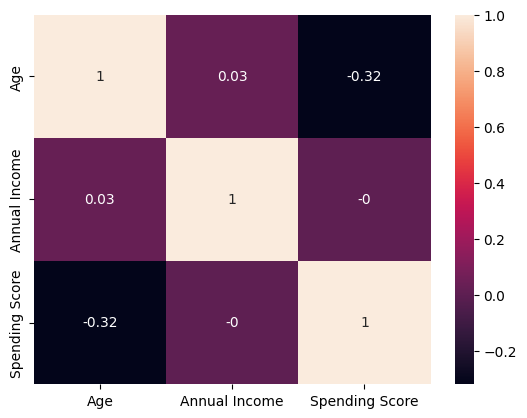

In [16]:
# Feature Engineering

dummy_df = outliers_removed_df[['Age', 'Annual Income', 'Spending Score']].copy()
corr  = np.round(dummy_df.corr(),2)
sns.heatmap(corr,annot=True)

In [17]:
# Feature Engineering

LabelEncoder = LabelEncoder()
new_df['Gender'] = LabelEncoder.fit_transform(new_df['Gender'])
new_df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


1 --> Male


2 --> Female

In [18]:
new_df.drop('CustomerID',axis=1,inplace=True)

In [19]:
new_df.head()

,Gender,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [20]:
new_df['Gender'].value_counts()

Gender
0    99
1    81
Name: count, dtype: int64

In [23]:
scaler = StandardScaler()

scale_data = new_df[['Annual Income','Spending Score']]
scaled_data = scaler.fit_transform(scale_data)
scaled_data

array([[-1.89968708, -0.43888179],
       [-1.89968708,  1.23684868],
       [-1.85231334, -1.75552715],
       [-1.85231334,  1.0772553 ],
       [-1.8049396 , -0.39898344],
       [-1.8049396 ,  1.03735695],
       [-1.75756585, -1.75552715],
       [-1.75756585,  1.75552715],
       [-1.71019211, -1.87522219],
       [-1.71019211,  0.87776358],
       [-1.71019211, -1.4363404 ],
       [-1.71019211,  1.95501888],
       [-1.66281837, -1.39644205],
       [-1.66281837,  1.0772553 ],
       [-1.66281837, -1.47623874],
       [-1.66281837,  1.15705199],
       [-1.61544463, -0.59847517],
       [-1.61544463,  0.63837351],
       [-1.52069714, -0.83786523],
       [-1.52069714,  1.91512053],
       [-1.4733234 , -0.59847517],
       [-1.4733234 ,  0.91766192],
       [-1.42594966, -1.7954255 ],
       [-1.42594966,  0.91766192],
       [-1.28382843, -1.4363404 ],
       [-1.28382843,  1.27674702],
       [-1.28382843, -0.7181702 ],
       [-1.28382843,  0.43888179],
       [-1.23645468,

Elbow Method

In [28]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=42,init='k-means++')
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

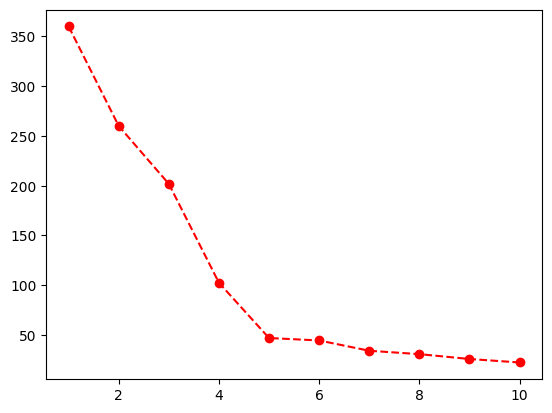

In [55]:
plt.plot(range(1,11),wcss,marker='o',color='red',linestyle='dashed')

n_clusters = 5

In [31]:
KMeans = KMeans(n_clusters=5,init='k-means++',random_state=42)
KMeans.fit(scaled_data)

KMeans(n_clusters=5, random_state=42)

In [32]:
new_df['Clusters'] = KMeans.labels_
new_df.head()

,Gender,Age,Annual Income,Spending Score,Clusters
0,1,19,15,39,2
1,1,21,15,81,4
2,0,20,16,6,2
3,0,23,16,77,4
4,0,31,17,40,2


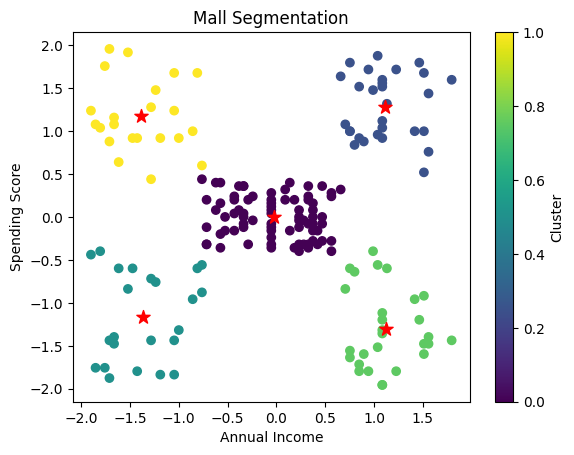

In [50]:
plt.scatter(scaled_data[:,0] , scaled_data[:,1],c=KMeans.labels_)
plt.scatter(KMeans.cluster_centers_[:,0],KMeans.cluster_centers_[:,1],c='red',marker='*',s=100)
plt.title('Mall Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.colorbar(label='Cluster')
plt.show()

In [43]:
KMeans.cluster_centers_

array([[-2.29580445e-02,  1.02303447e-03],
       [ 1.11099595e+00,  1.28362605e+00],
       [-1.36415782e+00, -1.16052141e+00],
       [ 1.12715669e+00, -1.29954607e+00],
       [-1.39149602e+00,  1.17156048e+00]])